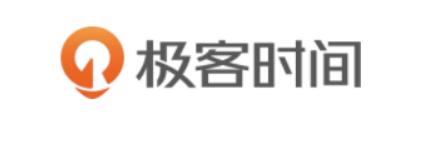

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


In [8]:
from PIL import Image
from torchvision import transforms

# transforms转换
img = Image.open('jk.png')
display(img)
print(type(img))  # PIL.Image.Image是PIL.JpegImagePlugin.JpegImageFile的基类

# PIL.Image转换为Tensor
img1 = transforms.ToTensor()(img)
print(type(img1))

# Tensor转换为PIL.Image
img2 = transforms.ToPILImage()(img1)  #PIL.Image.Image
print(type(img2))

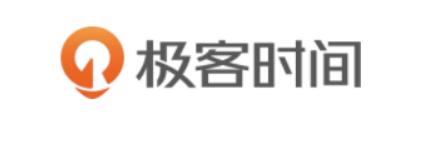

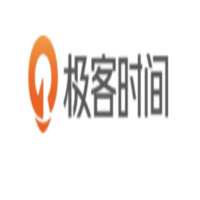

In [9]:
from PIL import Image
from torchvision import transforms

# Resize
## 定义操作
resize_img_oper = transforms.Resize((200, 200), interpolation=2)

# 原图
orig_img = Image.open("jk.png")
display(orig_img)

img = resize_img_oper(orig_img)
display(img)

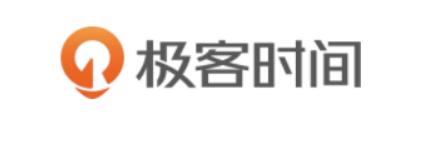

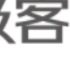

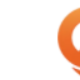

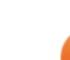

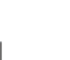

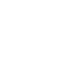

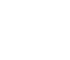

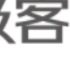

In [13]:
from PIL import Image
from torchvision import transforms

# 剪裁
## 定义操作
center_crop_oper = transforms.CenterCrop((60, 70))
random_crop_oper = transforms.RandomCrop((80, 80))
five_crop_oper = transforms.FiveCrop((60, 70))
# 原图
orig_img = Image.open('jk.png')
display(orig_img)
# 中心剪裁
img1 = center_crop_oper(orig_img)
display(img1)
# 随机剪裁
img2 = random_crop_oper(orig_img)
display(img2)
# 四角和中心剪裁
imgs = five_crop_oper(orig_img)
for img in imgs: display(img)

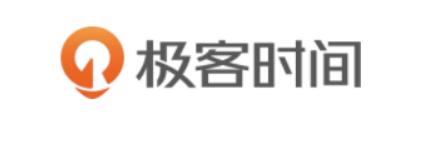

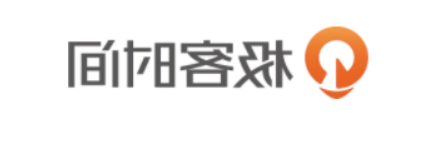

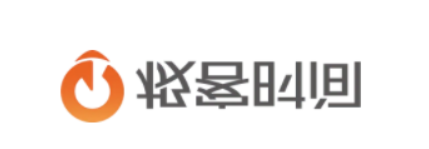

In [14]:
from PIL import Image
from torchvision import transforms

# 翻转
# 操作：水平或者垂直翻转
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
v_flip_oper = transforms.RandomVerticalFlip(p=1)

orig_img = Image.open('jk.png')
display(orig_img)

img1 = h_flip_oper(orig_img)
display(img1)

img2 = v_flip_oper(orig_img)
display(img2)

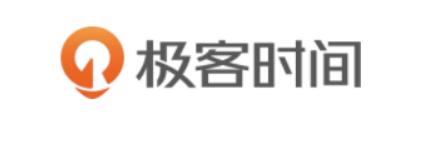

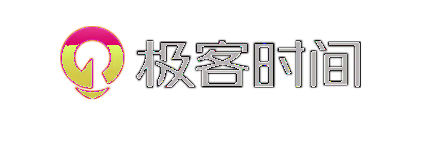

In [16]:
from PIL import Image
from torchvision import transforms

# 对Tensor的操作
## 标准化
norm_oper = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

orig_img = Image.open('jk.png')
display(orig_img)
img_tensor = transforms.ToTensor()(orig_img)

tensor_norm = norm_oper(img_tensor)
img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

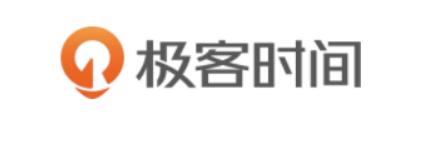

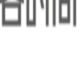

In [17]:
from PIL import Image
from torchvision import transforms

# 组合
composed = transforms.Compose([transforms.Resize((200, 200)),
                               transforms.RandomCrop(80)])

orig_img = Image.open('jk.png')
display(orig_img)

img = composed(orig_img)
display(img)

In [22]:
from PIL import Image
from torchvision import transforms
from torchvision import datasets

# 结合dataset使用transform
my_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))])

mnist_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=my_transform,# 指定为你的图像处理器
    target_transform=None,
    download=True
)

item = mnist_dataset.__getitem__(0)
print(type(item[0]))

# transforms中实际工作中的使用
transform = transforms.Compose([
    transforms.RandomResizedCrop(dest_image_size),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


<class 'torch.Tensor'>
